In [3]:
import pandas as pd

# Load observations.csv
obs = pd.read_csv("observations.csv")

# Define lab tests, normal range, and weight
lab_tests = {
    "WBC": (4.0, 11.0, 0.25),
    "LACTATE": (0.5, 2.2, 0.30),
    "CREATININE": (0.6, 1.3, 0.20),
    "SODIUM": (135, 145, 0.15),
    "POTASSIUM": (3.5, 5.0, 0.10)
}

# Filter only required lab observations
filtered = obs[obs["DESCRIPTION"].isin(lab_tests.keys())].copy()

# Score function with safety for bad values
def lab_score(row):
    desc = row["DESCRIPTION"]
    val = row["VALUE"]

    try:
        val = float(val)
        low, high, _ = lab_tests[desc]
        return 0 if low <= val <= high else 1
    except:
        return None  # or return 0 if you prefer

# Apply score
filtered["score"] = filtered.apply(lab_score, axis=1)

# Drop rows with invalid values
filtered = filtered[filtered["score"].notnull()]

# Assign weights
filtered["weight"] = filtered["DESCRIPTION"].map(lambda x: lab_tests[x][2])
filtered["weighted_score"] = filtered["score"] * filtered["weight"]

# Take the worst lab score per test per patient
lab_grouped = filtered.groupby(["PATIENT", "DESCRIPTION"])["weighted_score"].max().reset_index()

# Sum scores per patient
lab_final = lab_grouped.groupby("PATIENT")["weighted_score"].sum().reset_index()
lab_final.rename(columns={"weighted_score": "L_score"}, inplace=True)

# Final output: PATIENT + L_score
print(lab_final.head())


Empty DataFrame
Columns: [PATIENT, L_score]
Index: []


In [5]:
print(obs.columns)

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CATEGORY', 'CODE', 'DESCRIPTION',
       'VALUE', 'UNITS', 'TYPE'],
      dtype='object')


In [7]:
print(obs.head())

                   DATE                               PATIENT  \
0  2016-02-24T15:24:06Z  782c4f6e-4b08-ffba-af94-d6c1677ea363   
1  2016-02-24T15:24:06Z  782c4f6e-4b08-ffba-af94-d6c1677ea363   
2  2016-02-24T15:24:06Z  782c4f6e-4b08-ffba-af94-d6c1677ea363   
3  2016-02-24T15:24:06Z  782c4f6e-4b08-ffba-af94-d6c1677ea363   
4  2016-02-24T15:24:06Z  782c4f6e-4b08-ffba-af94-d6c1677ea363   

                              ENCOUNTER     CATEGORY     CODE  \
0  60938dfd-6f40-691a-39b7-9e1749bbbc83  vital-signs   8302-2   
1  60938dfd-6f40-691a-39b7-9e1749bbbc83  vital-signs  72514-3   
2  60938dfd-6f40-691a-39b7-9e1749bbbc83  vital-signs  29463-7   
3  60938dfd-6f40-691a-39b7-9e1749bbbc83  vital-signs  39156-5   
4  60938dfd-6f40-691a-39b7-9e1749bbbc83  vital-signs   8462-4   

                                         DESCRIPTION  VALUE    UNITS     TYPE  
0                                        Body Height  166.4       cm  numeric  
1  Pain severity - 0-10 verbal numeric rating [Sc...    3.

In [9]:
import pandas as pd

# Load dataset
obs = pd.read_csv("observations.csv")

# STEP 1: Filter only lab tests (if available)
obs = obs[obs["CATEGORY"].str.lower() == "laboratory"]  # <== updated line

# STEP 2: Define actual lab names from your data
lab_tests = {
    "White blood cells [#/volume] in Blood by Automated count": (4.0, 11.0, 0.25),
    "Lactic acid [Moles/volume] in Blood": (0.5, 2.2, 0.30),
    "Creatinine [Mass/volume] in Serum or Plasma": (0.6, 1.3, 0.20),
    "Sodium [Moles/volume] in Serum or Plasma": (135, 145, 0.15),
    "Potassium [Moles/volume] in Serum or Plasma": (3.5, 5.0, 0.10)
}

# STEP 3: Filter observations
filtered = obs[obs["DESCRIPTION"].isin(lab_tests.keys())].copy()

# STEP 4: Score function
def lab_score(row):
    desc = row["DESCRIPTION"]
    val = row["VALUE"]

    try:
        val = float(val)
        low, high, _ = lab_tests[desc]
        return 0 if low <= val <= high else 1
    except:
        return None

filtered["score"] = filtered.apply(lab_score, axis=1)
filtered = filtered[filtered["score"].notnull()]

# STEP 5: Assign weights and calculate weighted score
filtered["weight"] = filtered["DESCRIPTION"].map(lambda x: lab_tests[x][2])
filtered["weighted_score"] = filtered["score"] * filtered["weight"]

# STEP 6: Group by patient and sum scores
lab_grouped = filtered.groupby(["PATIENT", "DESCRIPTION"])["weighted_score"].max().reset_index()
lab_final = lab_grouped.groupby("PATIENT")["weighted_score"].sum().reset_index()
lab_final.rename(columns={"weighted_score": "L_score"}, inplace=True)

# Final lab score output
print(lab_final.head())


                                PATIENT  L_score
0  268c76e6-547a-a0a4-cb25-3d6b7150c58c      0.3
1  3118517f-db3b-e013-b506-411e307bfd25      0.3
2  445597bd-e97c-c2a8-794a-55eb1d629dce      0.3
3  71c9bea6-42cc-c935-911b-7177724f6475      0.3
4  74e6ba5c-60e1-6b07-6d3c-35003df9265e      0.3


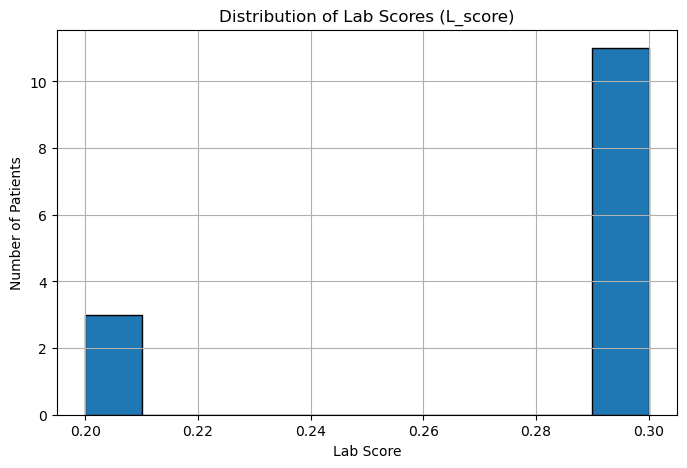

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(lab_final["L_score"], bins=10, edgecolor='black')
plt.title("Distribution of Lab Scores (L_score)")
plt.xlabel("Lab Score")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


C:\Users\savas\AppData\Local\Temp\ipykernel_11424\3927429693.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lab_final["L_score"], shade=True)


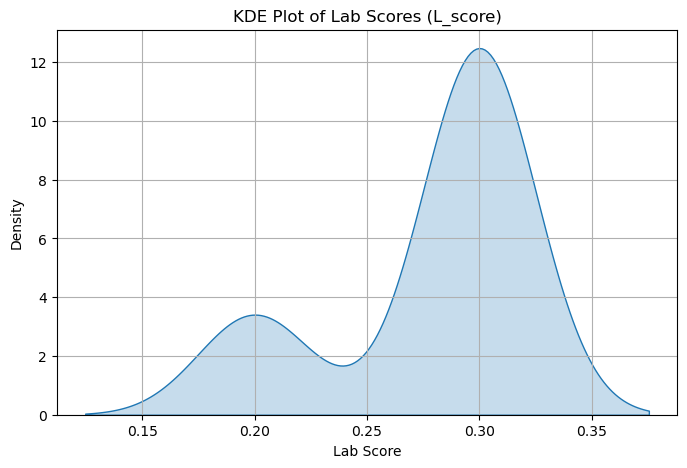

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(lab_final["L_score"], shade=True)
plt.title("KDE Plot of Lab Scores (L_score)")
plt.xlabel("Lab Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [15]:
print(lab_final["L_score"].describe())


count    14.000000
mean      0.278571
std       0.042582
min       0.200000
25%       0.300000
50%       0.300000
75%       0.300000
max       0.300000
Name: L_score, dtype: float64


In [17]:
print(lab_final["L_score"].value_counts())


L_score
0.3    11
0.2     3
Name: count, dtype: int64


In [25]:
print(filtered["DESCRIPTION"].value_counts())


DESCRIPTION
Creatinine [Mass/volume] in Serum or Plasma    378
Sodium [Moles/volume] in Serum or Plasma       378
Potassium [Moles/volume] in Serum or Plasma    378
Name: count, dtype: int64


In [27]:
print(filtered[["DESCRIPTION", "VALUE", "score"]].head(20))


                                      DESCRIPTION  VALUE  score
2480  Creatinine [Mass/volume] in Serum or Plasma    1.5      1
2482     Sodium [Moles/volume] in Serum or Plasma  143.8      0
2483  Potassium [Moles/volume] in Serum or Plasma    4.2      0
2539  Creatinine [Mass/volume] in Serum or Plasma    1.5      1
2541     Sodium [Moles/volume] in Serum or Plasma  143.0      0
2542  Potassium [Moles/volume] in Serum or Plasma    3.9      0
2581  Creatinine [Mass/volume] in Serum or Plasma    1.4      1
2583     Sodium [Moles/volume] in Serum or Plasma  143.5      0
2584  Potassium [Moles/volume] in Serum or Plasma    5.2      1
2706  Creatinine [Mass/volume] in Serum or Plasma    1.8      1
2708     Sodium [Moles/volume] in Serum or Plasma  138.6      0
2709  Potassium [Moles/volume] in Serum or Plasma    4.8      0
2763  Creatinine [Mass/volume] in Serum or Plasma    1.6      1
2765     Sodium [Moles/volume] in Serum or Plasma  142.3      0
2766  Potassium [Moles/volume] in Serum 

In [29]:
print("Unique Lab Scores & Their Frequency:")
print(lab_final["L_score"].value_counts())


Unique Lab Scores & Their Frequency:
L_score
0.3    11
0.2     3
Name: count, dtype: int64


In [31]:
print("Lab Test Contribution Count:")
print(filtered["DESCRIPTION"].value_counts())


Lab Test Contribution Count:
DESCRIPTION
Creatinine [Mass/volume] in Serum or Plasma    378
Sodium [Moles/volume] in Serum or Plasma       378
Potassium [Moles/volume] in Serum or Plasma    378
Name: count, dtype: int64


In [33]:
print("Sample Lab Values & Their Scores:")
print(filtered[["PATIENT", "DESCRIPTION", "VALUE", "score"]].head(20))


Sample Lab Values & Their Scores:
                                   PATIENT  \
2480  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2482  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2483  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2539  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2541  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2542  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2581  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2583  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2584  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2706  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2708  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2709  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2763  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2765  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2766  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2820  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2822  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2823  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2846  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   
2848  811ef7d3-a6c5-87d7-46ba-df9cbce29ac8   


In [35]:
# Convert DATE to datetime format
obs["DATE"] = pd.to_datetime(obs["DATE"])

# Sort by PATIENT, DESCRIPTION, and DATE (latest first)
latest_labs = obs.sort_values(["PATIENT", "DESCRIPTION", "DATE"], ascending=[True, True, False])

# Keep only the most recent lab test per patient
latest_labs = latest_labs.drop_duplicates(subset=["PATIENT", "DESCRIPTION"], keep="first")

print("Sample of latest lab results per patient:")
print(latest_labs.head(10))


Sample of latest lab results per patient:
                           DATE                               PATIENT  \
17890 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17881 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17886 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17885 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17879 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17888 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17889 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17887 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17892 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   
17893 2024-01-25 00:38:26+00:00  0230d89f-b3fb-585a-cad9-6249f9b95a63   

                                  ENCOUNTER    CATEGORY     CODE  \
17890  2bb72339-8ffe-bb77-4d8a-0039a0864ff2  laboratory  21000-5   
17881  2bb72339-8f

In [37]:
lab_tests = {
    "White blood cells [#/volume] in Blood by Automated count": (4.0, 11.0, 0.25),
    "Lactic acid [Moles/volume] in Blood": (0.5, 2.2, 0.30),
    "Creatinine [Mass/volume] in Serum or Plasma": (0.6, 1.3, 0.20),
    "Sodium [Moles/volume] in Serum or Plasma": (135, 145, 0.15),
    "Potassium [Moles/volume] in Serum or Plasma": (3.5, 5.0, 0.10),
    "Glucose [Mass/volume] in Blood": (70, 140, 0.15),  # Example additional test
    "Hemoglobin [Mass/volume] in Blood": (12, 18, 0.20)  # Example additional test
}


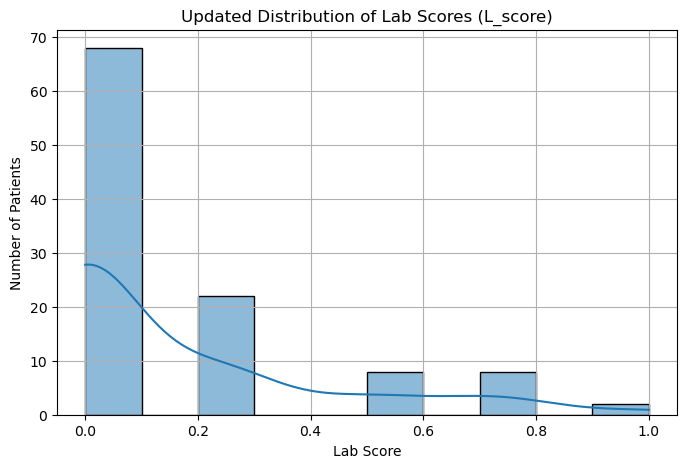

In [41]:
import pandas as pd

# Load dataset
obs = pd.read_csv("observations.csv")

# ✅ Step 1: Keep only lab test observations
obs = obs[obs["CATEGORY"].str.lower() == "laboratory"]

# ✅ Step 2: Expand the list of lab tests used for scoring
lab_tests = {
    "White blood cells [#/volume] in Blood by Automated count": (4.0, 11.0, 0.20),  # WBC
    "Lactic acid [Moles/volume] in Blood": (0.5, 2.2, 0.25),  # Lactate
    "Creatinine [Mass/volume] in Serum or Plasma": (0.6, 1.3, 0.20),  # Kidney function
    "Sodium [Moles/volume] in Serum or Plasma": (135, 145, 0.15),  # Electrolyte balance
    "Potassium [Moles/volume] in Serum or Plasma": (3.5, 5.0, 0.15),  # Electrolyte balance
    "Hemoglobin [Mass/volume] in Blood": (12, 18, 0.20),  # Oxygen carrying capacity
    "Glucose [Mass/volume] in Blood": (70, 140, 0.15)  # Hyperglycemia risk
}

# ✅ Step 3: Filter dataset for relevant labs
filtered = obs[obs["DESCRIPTION"].isin(lab_tests.keys())].copy()

# ✅ Step 4: Function to score each lab test
def lab_score(row):
    desc = row["DESCRIPTION"]
    val = row["VALUE"]

    try:
        val = float(val)
        low, high, _ = lab_tests[desc]
        return 0 if low <= val <= high else 1  # 1 if abnormal, 0 if normal
    except:
        return None  # Return None if conversion fails

# Apply scoring function
filtered["score"] = filtered.apply(lab_score, axis=1)
filtered = filtered[filtered["score"].notnull()]  # Remove any None values

# ✅ Step 5: Assign weights based on test importance
filtered["weight"] = filtered["DESCRIPTION"].map(lambda x: lab_tests[x][2])
filtered["weighted_score"] = filtered["score"] * filtered["weight"]

# ✅ Step 6: Take the worst lab result per patient per test
lab_grouped = filtered.groupby(["PATIENT", "DESCRIPTION"])["weighted_score"].max().reset_index()

# ✅ Step 7: Sum all abnormal weighted scores per patient
lab_final = lab_grouped.groupby("PATIENT")["weighted_score"].sum().reset_index()
lab_final.rename(columns={"weighted_score": "L_score"}, inplace=True)

# ✅ Step 8: Normalize Scores Between 0-1 (Optional)
lab_final["L_score"] = lab_final["L_score"] / lab_final["L_score"].max()

# ✅ Step 9: Display final lab score distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(lab_final["L_score"], bins=10, kde=True, edgecolor="black")
plt.title("Updated Distribution of Lab Scores (L_score)")
plt.xlabel("Lab Score")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()



=== Summary Statistics for L_score ===
count    108.000000
mean       0.159392
std        0.254392
min        0.000000
25%        0.000000
50%        0.000000
75%        0.214286
max        1.000000
Name: L_score, dtype: float64

=== Unique Lab Scores and Counts ===
L_score
0.000000    68
0.214286    14
0.285714     8
0.500000     7
0.714286     6
1.000000     2
0.785714     2
0.571429     1
Name: count, dtype: int64


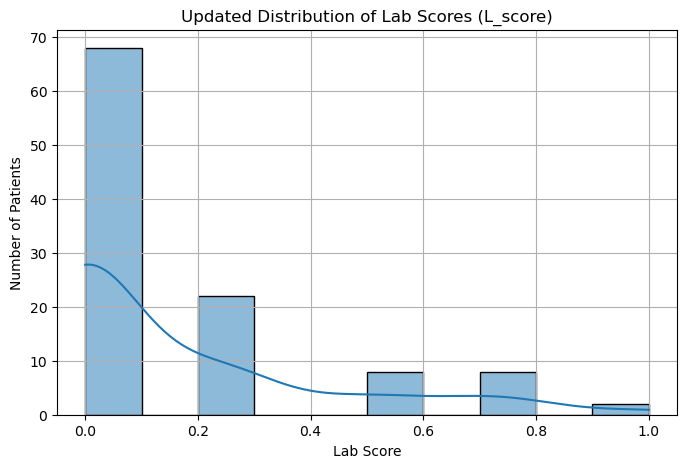

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Load observations dataset
obs = pd.read_csv("observations.csv")

# ✅ Step 2: Keep only laboratory test results
obs = obs[obs["CATEGORY"].str.lower() == "laboratory"]

# ✅ Step 3: Define lab test thresholds & weights
lab_tests = {
    "White blood cells [#/volume] in Blood by Automated count": (4.0, 11.0, 0.20),  # WBC
    "Lactic acid [Moles/volume] in Blood": (0.5, 2.2, 0.25),  # Lactate
    "Creatinine [Mass/volume] in Serum or Plasma": (0.6, 1.3, 0.20),  # Kidney function
    "Sodium [Moles/volume] in Serum or Plasma": (135, 145, 0.15),  # Electrolyte balance
    "Potassium [Moles/volume] in Serum or Plasma": (3.5, 5.0, 0.15),  # Electrolyte balance
    "Hemoglobin [Mass/volume] in Blood": (12, 18, 0.20),  # Oxygen carrying capacity
    "Glucose [Mass/volume] in Blood": (70, 140, 0.15)  # Hyperglycemia risk
}

# ✅ Step 4: Filter dataset for relevant labs
filtered = obs[obs["DESCRIPTION"].isin(lab_tests.keys())].copy()

# ✅ Step 5: Function to assign scores based on normal range
def lab_score(row):
    desc = row["DESCRIPTION"]
    val = row["VALUE"]

    try:
        val = float(val)
        low, high, _ = lab_tests[desc]
        return 0 if low <= val <= high else 1  # 1 if abnormal, 0 if normal
    except:
        return None  # Skip bad values

# Apply scoring function
filtered["score"] = filtered.apply(lab_score, axis=1)
filtered = filtered[filtered["score"].notnull()]  # Remove any None values

# ✅ Step 6: Assign weights and compute weighted score
filtered["weight"] = filtered["DESCRIPTION"].map(lambda x: lab_tests[x][2])
filtered["weighted_score"] = filtered["score"] * filtered["weight"]

# ✅ Step 7: Take the worst lab result per patient per test
lab_grouped = filtered.groupby(["PATIENT", "DESCRIPTION"])["weighted_score"].max().reset_index()

# ✅ Step 8: Sum all abnormal weighted scores per patient
lab_final = lab_grouped.groupby("PATIENT")["weighted_score"].sum().reset_index()
lab_final.rename(columns={"weighted_score": "L_score"}, inplace=True)

# ✅ Step 9: Normalize Scores Between 0-1
lab_final["L_score"] = lab_final["L_score"] / lab_final["L_score"].max()

# ✅ Step 10: Print Summary Stats
print("\n=== Summary Statistics for L_score ===")
print(lab_final["L_score"].describe())

print("\n=== Unique Lab Scores and Counts ===")
print(lab_final["L_score"].value_counts())

# ✅ Step 11: Plot the Distribution
plt.figure(figsize=(8, 5))
sns.histplot(lab_final["L_score"], bins=10, kde=True, edgecolor="black")
plt.title("Updated Distribution of Lab Scores (L_score)")
plt.xlabel("Lab Score")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()
